## Data Wrangling Exercise_Crimes in Boston

In [1]:
#basic lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings

%matplotlib inline

In [2]:
#loading the data

#please give relavant path for file as per curr. working directory

df=pd.read_csv(r'C:\Users\hp\Data Science\ML Practice\Crimes in Boston\crime.csv')

#Data for this test can be downloaded from https://www.kaggle.com/AnalyzeBoston/crimes-in-boston

In [3]:
#read the data
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,02-09-2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,21-08-2018 00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,03-09-2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,03-09-2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,03-09-2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


## 1. Write a script that shows count of Auto Theft and Towed by Phase of Day(as index) vs Month(as column).

In [4]:
#extract time from datetime of incident

import datetime
from datetime import datetime

# Phase of day is defined as:
# Morning = 6 a.m to 11 a.m 
# Noon = 11.01 a.m to 5 p.m 
# Evening = 5.01 p.m to 8 p.m 
# Night = 8.01 p.m to 5.59 a.m

#sample times
am6='01-01-2018 06:00'
am11='01-01-2018 11:00'
am1101='01-01-2018 11:01'
pm5='01-01-2018 17:00'
pm501='01-01-2018 17:01'
pm8='01-01-2018 20:00'
pm801='01-01-2018 20:01'
am559='01-01-2018 05:59'

#date time obj
am6_obj = datetime.strptime(am6,"%d-%m-%Y %H:%M")
am11_obj = datetime.strptime(am11,"%d-%m-%Y %H:%M")
am1101_obj = datetime.strptime(am1101,"%d-%m-%Y %H:%M")
pm5_obj = datetime.strptime(pm5,"%d-%m-%Y %H:%M")
pm501_obj = datetime.strptime(pm501,"%d-%m-%Y %H:%M")
pm8_obj = datetime.strptime(pm8,"%d-%m-%Y %H:%M")
pm801_obj = datetime.strptime(pm801,"%d-%m-%Y %H:%M")
am559_obj = datetime.strptime(am559,"%d-%m-%Y %H:%M")

#seperation of time
am6_time = am6_obj.time()
am11_time = am11_obj.time()
am1101_time = am1101_obj.time()
pm5_time = pm5_obj.time()
pm501_time = pm501_obj.time()
pm8_time = pm8_obj.time()
pm801_time = pm801_obj.time()
am559_time = am559_obj.time()

#list to save the indexs of respective rows
morning=[]
noon=[]
evening=[]
night=[]

#seperate out indexs for each cat

for index,i in enumerate(df['OCCURRED_ON_DATE']):
    datetime_obj = datetime.strptime(i,"%d-%m-%Y %H:%M")
    time = datetime_obj.time()
    if time>=am6_time and time<=am11_time:
        morning.append(index)
    elif time>=am1101_time and time<=pm5_time:
        noon.append(index)
    elif time>=pm501_time and time<=pm8_time:
        evening.append(index)
    else:
        night.append(index)


In [5]:
#adding new col Phase_of_day with 4 cat - Morning, Noon, Evening, Night
df['Phase_of_day']=0
for i in morning:
    df['Phase_of_day'][i]='Morning'
for i in noon:
    df['Phase_of_day'][i]='Noon'
for i in evening:
    df['Phase_of_day'][i]='Evening'
for i in night:
    df['Phase_of_day'][i]='Night'

<ipython-input-5-c36626c2816c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Phase_of_day'][i]='Morning'
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-5-c36626c2816c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Phase_of_day'][i]='Noon'
<ipython-input-5-c36626c2816c>:8: SettingWithCopyWarn

In [6]:
#read the values count for Phase_of_day for complete data set
df['Phase_of_day'].value_counts()


Noon       106608
Night       94123
Morning     59883
Evening     58459
Name: Phase_of_day, dtype: int64

In [7]:
#seperate out data for Auto Theft and Towed in new dataframe

df2=df.loc[(df['OFFENSE_CODE_GROUP']=='Auto Theft') | (df['OFFENSE_CODE_GROUP']=='Towed')]


In [8]:
#seperate required cols

df3=df2[['Phase_of_day','MONTH']]

#Naming of months

df3['MONTH']=df3['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                               7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

#Final Values count for each month vs phase of the day

df4=pd.get_dummies(data=df3,columns=['MONTH'])

#proper sequence of months/cols
df5=df4[['Phase_of_day', 'MONTH_Jan', 'MONTH_Feb', 'MONTH_Mar', 'MONTH_Apr',
        'MONTH_May', 'MONTH_Jun', 'MONTH_Jul', 'MONTH_Aug', 'MONTH_Sept',
        'MONTH_Oct', 'MONTH_Nov', 'MONTH_Dec']]



<ipython-input-8-006a0d389f93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['MONTH']=df3['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',


## Answer

In [9]:
df5.groupby(['Phase_of_day']).sum()

,MONTH_Jan,MONTH_Feb,MONTH_Mar,MONTH_Apr,MONTH_May,MONTH_Jun,MONTH_Jul,MONTH_Aug,MONTH_Sept,MONTH_Oct,MONTH_Nov,MONTH_Dec
Phase_of_day,,,,,,,,,,,,
Evening,134.0,133.0,135.0,152.0,157.0,180.0,222.0,193.0,157.0,151.0,153.0,143.0
Morning,368.0,372.0,425.0,439.0,583.0,668.0,659.0,806.0,557.0,510.0,424.0,456.0
Night,269.0,283.0,296.0,294.0,339.0,397.0,424.0,477.0,328.0,327.0,323.0,296.0
Noon,281.0,258.0,295.0,277.0,334.0,390.0,395.0,462.0,362.0,289.0,263.0,302.0


<Figure size 432x288 with 0 Axes>

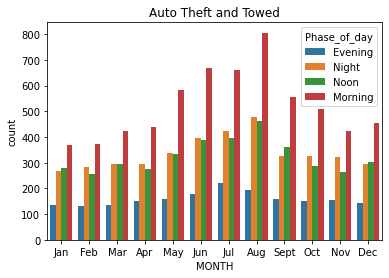

<Figure size 432x288 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=df3,hue='Phase_of_day',x='MONTH',
              order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.title('Auto Theft and Towed')
plt.figure(20)

# ---------------------------------------------------------------

## 2. Write script to get offense (full offense name provided in offense_codes.csv file) per district which has maximum occurrence in respective district

In [11]:
#loading the data

#please give relavant path for file as per curr. working directory

df=pd.read_csv(r'C:\Users\hp\Data Science\ML Practice\Crimes in Boston\crime.csv')

## Answer

In [12]:
for i in df['DISTRICT'].unique():
    a=df.loc[df['DISTRICT']==i]
    b=a['OFFENSE_CODE_GROUP'].value_counts(ascending = False)[0:1]
    print('DISTRICT :',i)
    print('---------')
    print(b)
    print('========')


DISTRICT : D14
---------
Motor Vehicle Accident Response    2857
Name: OFFENSE_CODE_GROUP, dtype: int64
DISTRICT : C11
---------
Motor Vehicle Accident Response    5305
Name: OFFENSE_CODE_GROUP, dtype: int64
DISTRICT : D4
---------
Larceny    7313
Name: OFFENSE_CODE_GROUP, dtype: int64
DISTRICT : B3
---------
Motor Vehicle Accident Response    3836
Name: OFFENSE_CODE_GROUP, dtype: int64
DISTRICT : B2
---------
Motor Vehicle Accident Response    6407
Name: OFFENSE_CODE_GROUP, dtype: int64
DISTRICT : C6
---------
Motor Vehicle Accident Response    2699
Name: OFFENSE_CODE_GROUP, dtype: int64
DISTRICT : nan
---------
Series([], Name: OFFENSE_CODE_GROUP, dtype: int64)
DISTRICT : A1
---------
Larceny    4704
Name: OFFENSE_CODE_GROUP, dtype: int64
DISTRICT : E5
---------
Motor Vehicle Accident Response    1813
Name: OFFENSE_CODE_GROUP, dtype: int64
DISTRICT : A7
---------
Motor Vehicle Accident Response    1516
Name: OFFENSE_CODE_GROUP, dtype: int64
DISTRICT : E13
---------
Motor Vehicle Acci

## 3. Add a column to data set which contains date of last incidents happened in respective district
For Example: if a state has N incidents, a column should be added to dataset with (i+1)th incident having date of ith incident in that column

In [13]:
#loading the data

#please give relavant path for file as per curr. working directory

df=pd.read_csv(r'C:\Users\hp\Data Science\ML Practice\Crimes in Boston\crime.csv')

#extract date and time in new col-date and time
date1=[]
time1=[]

import datetime
from datetime import datetime

for i in df['OCCURRED_ON_DATE']:
    datetime_obj = datetime.strptime(i,"%d-%m-%Y %H:%M")
    date = datetime_obj.day
    date1.append(date)
    
for i in df['OCCURRED_ON_DATE']:
    datetime_obj = datetime.strptime(i,"%d-%m-%Y %H:%M")
    time = datetime_obj.time()
    time1.append(time)

df['date']=date1
df['time']=time1

#sort values first with date & then time to get recent incidents
df.sort_values(['YEAR','MONTH','date','time'],ascending=[0,0,0,0],inplace=True)

#group by DISTRICT and select top record in that DISTRICT
a=df.groupby('DISTRICT', as_index=False).first()

print('Date of last incidents happened in respective district')
b=a[['DISTRICT','OCCURRED_ON_DATE']]
print(b)
 

Date of last incidents happened in respective district
   DISTRICT  OCCURRED_ON_DATE
0        A1  03-09-2018 18:30
1       A15  03-09-2018 11:49
2        A7  03-09-2018 16:43
3        B2  03-09-2018 21:25
4        B3  03-09-2018 21:05
5       C11  03-09-2018 21:09
6        C6  03-09-2018 20:48
7       D14  03-09-2018 14:06
8        D4  03-09-2018 21:16
9       E13  03-09-2018 16:00
10      E18  03-09-2018 15:51
11       E5  03-09-2018 18:33


In [14]:
#creating new col -last_incidents_happened  and value of date for last incidents happened
#datetime in that DISTRICT

df.loc[(df['DISTRICT']=='A1'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'A1', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='A15'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'A15', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='A7'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'A7', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='B2'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'B2', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='B3'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'B3', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='C11'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'C11', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='C6'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'C6', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='D14'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'D14', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='D4'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'D4', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='E13'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'E13', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='E18'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'E18', 'OCCURRED_ON_DATE'].iloc[0]
df.loc[(df['DISTRICT']=='E5'),['last_incidents_happened']]=b.loc[b['DISTRICT'] == 'E5', 'OCCURRED_ON_DATE'].iloc[0]

#alternative way : 
#(but it got iteration error only upto 5 DISTRICT are filled with data, rest give error)

# for i in df['DISTRICT'].unique():
#     df.loc[(df['DISTRICT']==i),['last_incidents_happened']]=b.loc[b['DISTRICT'] == i, 'OCCURRED_ON_DATE'].iloc[0]

## Answer

In [15]:
#New column to data set which contains date 
#of last incidents happened in respective district is added

df
    
#check -run below code
# df['last_incidents_happened'].value_counts()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,date,time,last_incidents_happened
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,03-09-2018 21:25,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)",3,21:25:00,03-09-2018 21:25
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,03-09-2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",3,21:16:00,03-09-2018 21:16
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,03-09-2018 21:09,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)",3,21:09:00,03-09-2018 21:09
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,03-09-2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",3,21:05:00,03-09-2018 21:05
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,03-09-2018 20:48,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)",3,20:48:00,03-09-2018 20:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310350,I152059178,2647,Other,THREATS TO DO BODILY HARM,C11,359,NaN,15-06-2015 00:00,2015,6,Monday,0,Part Two,WASHINGTON ST,42.293606,-71.071887,"(42.29360585, -71.07188650)",15,00:00:00,03-09-2018 21:09
314676,I152054279,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,NaN,15-06-2015 00:00,2015,6,Monday,0,Part Two,HARLEM ST,42.300217,-71.080979,"(42.30021684, -71.08097940)",15,00:00:00,03-09-2018 21:05
317446,I152051083,3130,Search Warrants,SEARCH WARRANT,A7,20,NaN,15-06-2015 00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)",15,00:00:00,03-09-2018 16:43
317447,I152051083,3115,Investigate Person,INVESTIGATE PERSON,A7,20,NaN,15-06-2015 00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)",15,00:00:00,03-09-2018 16:43


## 4. Write a script to identify street having maximum number of incidents for every district

In [16]:
#loading the data

#please give relavant path for file as per curr. working directory

df=pd.read_csv(r'C:\Users\hp\Data Science\ML Practice\Crimes in Boston\crime.csv')

## Answer

In [17]:
for i in df['DISTRICT'].unique():
    a=df.loc[df['DISTRICT']==i]
    b=a['STREET'].value_counts(ascending = False)[0:1]
    print('District Name:',i)
    print('---------')
    print('street Name having maximum number of incidents :',b)
    print('========')

District Name: D14
---------
street Name having maximum number of incidents : COMMONWEALTH AVE    2759
Name: STREET, dtype: int64
District Name: C11
---------
street Name having maximum number of incidents : DORCHESTER AVE    4368
Name: STREET, dtype: int64
District Name: D4
---------
street Name having maximum number of incidents : BOYLSTON ST    5100
Name: STREET, dtype: int64
District Name: B3
---------
street Name having maximum number of incidents : BLUE HILL AVE    4952
Name: STREET, dtype: int64
District Name: B2
---------
street Name having maximum number of incidents : BLUE HILL AVE    2829
Name: STREET, dtype: int64
District Name: C6
---------
street Name having maximum number of incidents : MASSACHUSETTS AVE    1854
Name: STREET, dtype: int64
District Name: nan
---------
street Name having maximum number of incidents : Series([], Name: STREET, dtype: int64)
District Name: A1
---------
street Name having maximum number of incidents : WASHINGTON ST    2793
Name: STREET, dtype:

## 5. Create a subset of data, with only 10 recent incidents for each Street

In [18]:
import datetime
from datetime import datetime

#loading the data

#please give relavant path for file as per curr. working directory

df=pd.read_csv(r'C:\Users\hp\Data Science\ML Practice\Crimes in Boston\crime.csv')

In [19]:
#extract date and time in new col-date and time
date1=[]
time1=[]

for i in df['OCCURRED_ON_DATE']:
    datetime_obj = datetime.strptime(i,"%d-%m-%Y %H:%M")
    date = datetime_obj.day
    date1.append(date)
    
for i in df['OCCURRED_ON_DATE']:
    datetime_obj = datetime.strptime(i,"%d-%m-%Y %H:%M")
    time = datetime_obj.time()
    time1.append(time)

df['date']=date1
df['time']=time1

In [20]:
#sort values first with date & then time to get recent incidents
df.sort_values(['YEAR','MONTH','date','time'],ascending=[0,0,0,0],inplace=True)

## Answer

In [21]:
#group by Stree and select top 10 records

df.groupby('STREET', as_index=False).head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,date,time
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,03-09-2018 21:25,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)",3,21:25:00
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,03-09-2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",3,21:16:00
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,03-09-2018 21:09,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)",3,21:09:00
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,03-09-2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",3,21:05:00
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,03-09-2018 20:48,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)",3,20:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318628,I152049586,3301,Verbal Disputes,VERBAL DISPUTE,E5,682,NaN,15-06-2015 12:45,2015,6,Monday,12,Part Three,BERYL ST,42.282814,-71.139320,"(42.28281409, -71.13931958)",15,12:45:00
318601,I152049621,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,NaN,,NaN,15-06-2015 11:30,2015,6,Monday,11,Part One,NEWCOMB,NaN,NaN,"(0.00000000, 0.00000000)",15,11:30:00
318470,I152049818,3201,Property Lost,PROPERTY - LOST,B2,327,NaN,15-06-2015 08:30,2015,6,Monday,8,Part Three,EMROSE TER,42.314605,-71.072075,"(42.31460520, -71.07207475)",15,08:30:00
318698,I152049469,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,809,NaN,15-06-2015 00:45,2015,6,Monday,0,Part Two,BAGNAL ST,42.359569,-71.135982,"(42.35956890, -71.13598188)",15,00:45:00


In [23]:
#check through excel

a=df.groupby('STREET', as_index=False).head(10)
a.to_csv(r'C:\Users\hp\Data Science\ML Practice\Crimes in Boston\street1.csv')